In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors

# %matplotlib widget

In [2]:
file_dir = "images\\PyTorch_t1010_100858_important_version\\logs\\"
files_list = [f"stats_{i}.csv" for i in range(4, 81, 4)]

In [3]:
smooth = 500

In [4]:
df_list = []
for ind, file in enumerate(files_list):
    df_list.append(pd.read_csv(file_dir + file))
    df_list[ind]["smoothed_g_loss"] = df_list[ind].g_loss.rolling(smooth, center=True).mean()
    df_list[ind]["smoothed_d_loss"] = df_list[ind].d_loss.rolling(smooth, center=True).mean()

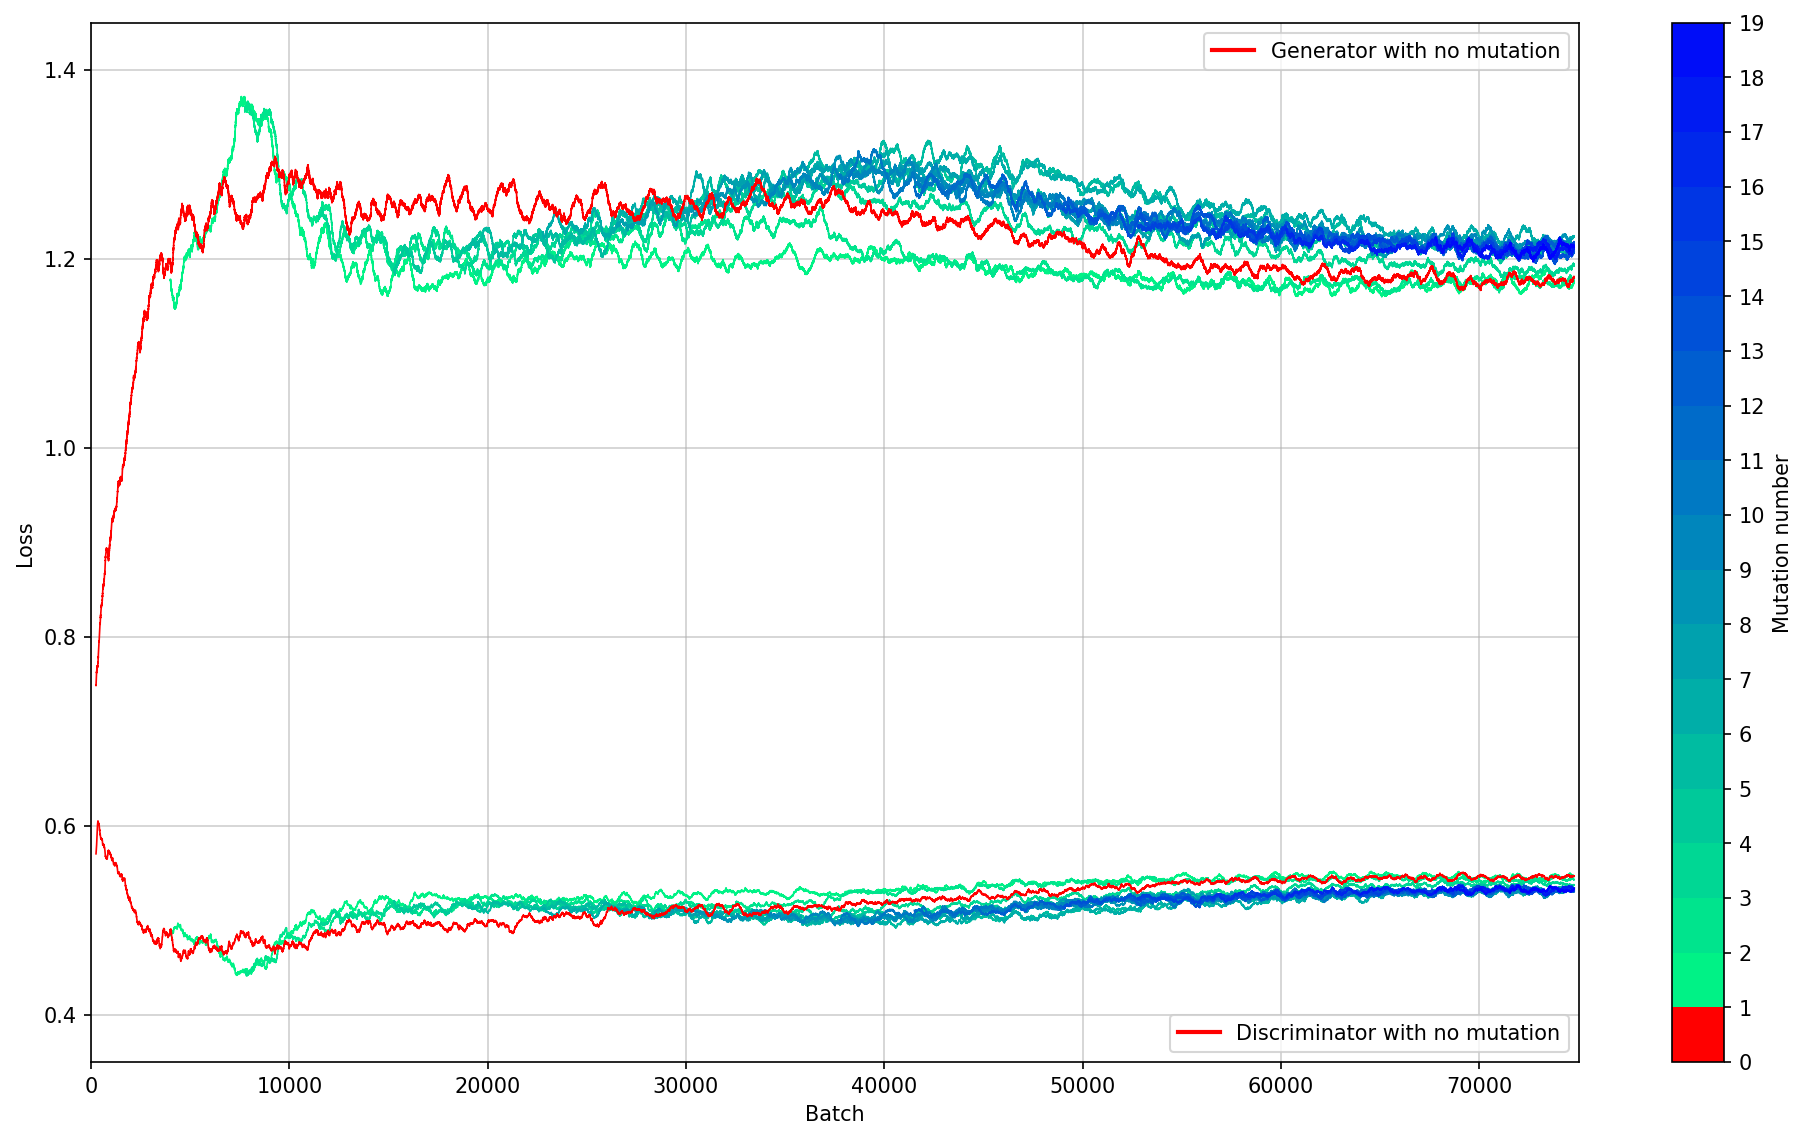

In [43]:
# plt.style.use("seaborn-whitegrid")
plt.style.use("default")
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] =  150

winter_r_cmap = cm.get_cmap("winter_r", 20)(np.linspace(0, 1, 20))

red_col = np.array(colors.to_rgba('red'))
winter_r_cmap[0, :] = red_col
newcmap = colors.ListedColormap(winter_r_cmap)
color_list = newcmap(np.linspace(0, 1, 20))

lines_g, lines_d = [], []
fig, ax = plt.subplots()
for ind, df in enumerate(df_list[1:]):
    lines_g.append(ax.plot(df.batch, df.smoothed_g_loss, lw=0.8, c=color_list[ind + 1]))
    lines_d.append(ax.plot(df.batch, df.smoothed_d_loss, lw=0.8, c=color_list[ind + 1]))

lines_g.insert(0, ax.plot(df_list[0].batch, df_list[0].smoothed_g_loss, label="Generator with no mutation", lw=0.8, c=color_list[0]))
lines_d.insert(0, ax.plot(df_list[0].batch, df_list[0].smoothed_d_loss, label="Discriminator with no mutation", lw=0.8, c=color_list[0]))
    
first_legend = ax.legend(handles=lines_g[0], loc='upper right')
fig.gca().add_artist(first_legend)
second_legend = ax.legend(handles=lines_d[0], loc='lower right')

for legobj in first_legend.legendHandles:
    legobj.set_linewidth(2.0)
for legobj in second_legend.legendHandles:
    legobj.set_linewidth(2.0)

norm = colors.Normalize(vmin=0, vmax=20)
bounds = np.linspace(0, 19, 20)
clb = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=newcmap),
                   ticks=bounds, boundaries=bounds)
clb.set_label("Mutation number")
# clb.ax.set_title("Mutation number", fontsize = 11);
# ax.hlines(y=1.12, 
#           xmin=0, 
#           xmax=75040,
#           color=virdis_colors[-1], alpha=0.6,
#           linestyle='--', linewidth=1
#          )
# ax.hlines(y=1.30, 
#           xmin=0, 
#           xmax=75040,
#           color="red", alpha=0.6,
#           linestyle='--', linewidth=1
#          )
# ax.set_title("Generator and discriminator loss plot")
ax.set_ylabel("Loss")
ax.set_xlabel("Batch")

ax.grid(True, which='major', alpha=0.6)
ax.set_xlim(0, 75040)
ax.set_ylim(0.35, 1.45)

plt.savefig("plot_2.png", dpi=300)
None

In [6]:
len(df_list[0])

75040